In [14]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import requests
from io import BytesIO
from sklearn.cluster import KMeans

# link a la imagen
link = 'https://static.wikia.nocookie.net/shrek/images/3/3f/Portada_img.jpg/revision/latest?cb=20100719002911&path-prefix=es'

In [15]:
#obtenemos la imagen
response = requests.get(link)
img = Image.open(BytesIO(response.content))

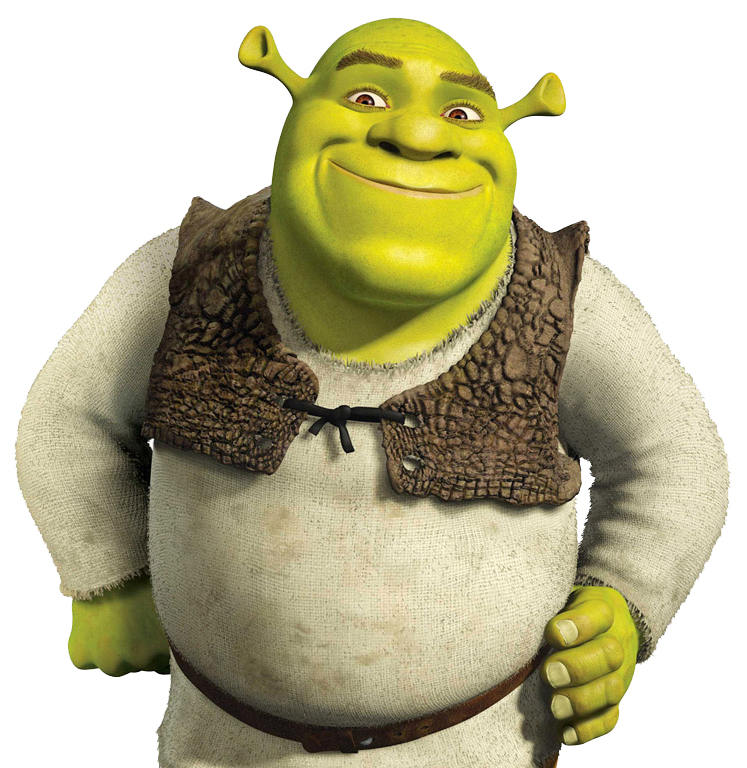

In [16]:
img

In [17]:
# cada pixel son 3 numeros
# image contiene una tupla de (460, 300, 3) para una imagen de 460x300
# pixels contiene una tupla de (138000, 3)
image = mpimg.imread(BytesIO(response.content),'jpg')
w, h, d = tuple(image.shape)
pixels = np.reshape(image, (w * h , d))

In [23]:
# n_colors será la cantidad de clusters
n_colors = 3
model = KMeans( n_clusters=n_colors, random_state=42).fit(pixels)
palette = np.uint8( model.cluster_centers_ )

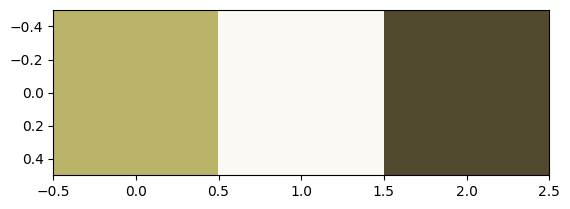

In [24]:
plt.imshow([palette])
plt.show()

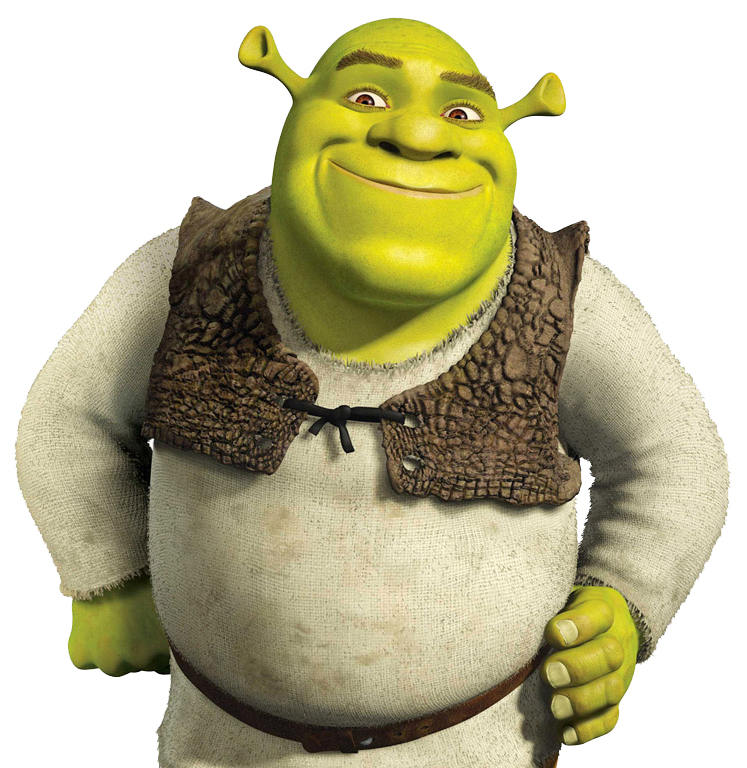

In [20]:
img